# ADA2017 - Homework 1

### Di WU - Shengzhao LEI - Tao SUN - Xiangzhe MENG

# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [6]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_context('notebook')

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [8]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [9]:
titanic = pd.read_excel(DATA_FOLDER + "titanic.xls", 'titanic')
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### Q1

In [10]:
pd.Categorical(titanic.sex)

[female, male, female, male, female, ..., female, female, male, male, male]
Length: 1309
Categories (2, object): [female, male]

In [11]:
titanic['sex'] = titanic.sex.astype('category')

In [12]:
pd.Categorical(titanic.pclass)

[1, 1, 1, 1, 1, ..., 3, 3, 3, 3, 3]
Length: 1309
Categories (3, int64): [1, 2, 3]

In [13]:
titanic['pclass'] = titanic.pclass.astype('category')

In [14]:
titanic.pclass.cat.as_ordered().head()

0    1
1    1
2    1
3    1
4    1
dtype: category
Categories (3, int64): [1 < 2 < 3]

In [15]:
titanic.pclass.cat.categories = ['1st class', '2nd class','3rd class']

In [16]:
pd.Categorical(titanic.embarked)

[S, S, S, S, S, ..., C, C, C, C, S]
Length: 1309
Categories (3, object): [C, Q, S]

In [17]:
titanic['embarked'] = titanic.embarked.astype('category')

In [18]:
titanic.embarked.cat.as_ordered().head()

0    S
1    S
2    S
3    S
4    S
dtype: category
Categories (3, object): [C < Q < S]

In [19]:
pd.Categorical(titanic.survived)

[1, 1, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1309
Categories (2, int64): [0, 1]

In [20]:
titanic['survived'] = titanic.survived.astype('category')

In [21]:
#assumption survived --> 1 not survived --> 0
titanic.survived.cat.categories = ['not survived', 'survived']

In [22]:
titanic.survived.cat.as_ordered().head()

0        survived
1        survived
2    not survived
3    not survived
4    not survived
dtype: category
Categories (2, object): [not survived < survived]

#### Q4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e1febe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e190940>], dtype=object)

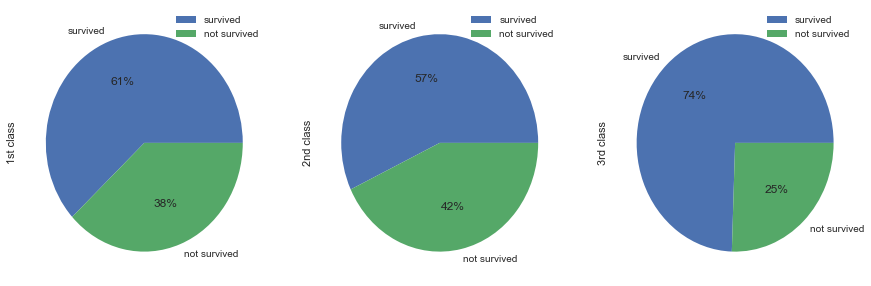

In [23]:
temp = pd.DataFrame(titanic.groupby(['pclass']).survived.value_counts())
pclass = ['1st class','2nd class','3rd class']
pieIndex=['survived','not survived']
pieValue=[]
for x in pclass:
    temp2 = [temp.loc[x].survived[0],temp.loc[x].survived[1]]
    pieValue.append(temp2)
df = pd.DataFrame(np.transpose(pieValue), index=pieIndex, columns = ['1st class','2nd class','3rd class'])
df.plot.pie(autopct = '%d%%',subplots=True, figsize=(15,5))